In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

In [8]:
single_image = X_train[0]

In [9]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

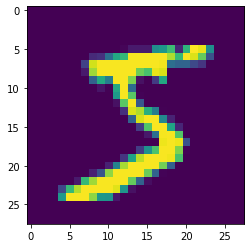

In [10]:
plt.imshow(single_image)

# PreProcessing Data

We first need to make sure the labels will be understandable by our CNN.

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

We need to translate this to be "one hot encoded" so our CNN can understand, otherwise it will think this is some sort of regression problem on a continuous axis. Luckily , Keras has an easy to use function for this

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_example = to_categorical(y_train)

In [15]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_example.shape

(60000, 10)

In [17]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
y_cat_test = to_categorical(y_test,10)

In [19]:
y_cat_train = to_categorical(y_train,10)

### Processing X Data

We should normalize the X data

In [20]:
single_image.max()

255

In [21]:
single_image.min()

0

In [22]:
X_train = X_train/255
X_test = X_test/255

In [23]:
scaled_image= X_train[0]

In [24]:
scaled_image.max()

1.0

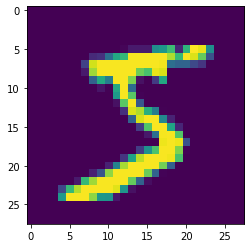

In [25]:
plt.imshow(scaled_image)

## Reshaping the Data

Right now our data is 60,000 images stored in 28 by 28 pixel array formation. 

This is correct for a CNN, but we need to add one more dimension to show we're dealing with 1 RGB channel (since technically the images are in black and white, only showing values from 0-255 on a single channel), an color image would have 3 dimensions.

In [26]:
X_train.shape

(60000, 28, 28)

In [27]:
X_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [28]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [29]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [30]:
X_train.shape

(60000, 28, 28, 1)

In [31]:
X_test.shape

(10000, 28, 28, 1)

## Creating Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [33]:
model=Sequential()

#CONVOLUTION LAYERS
model.add(Conv2D(filters=32,kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))

#pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER for fully connected layer

model.add(Flatten())

#128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)

model.add(Dense(128,activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

#compliing 

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [35]:
# prevent overfiiting  by using early stopping


In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop =EarlyStopping(monitor='val_loss',patience=2)

## training model

In [38]:
model.fit(x=X_train,y=y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1381 - accuracy: 0.9589 - val_loss: 0.0610 - val_accuracy: 0.9794
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0494 - accuracy: 0.9846 - val_loss: 0.0415 - val_accuracy: 0.9864
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0318 - accuracy: 0.9899 - val_loss: 0.0398 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.0377 - val_accuracy: 0.9881
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.0322 - val_accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0437 - val_accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0092 - accuracy: 0.9973 - val_loss: 0.0458 -

# model evalution

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
lossess= pd.DataFrame(model.history.history)

In [41]:
lossess.head()

,loss,accuracy,val_loss,val_accuracy
0,0.138089,0.958950,0.060952,0.9794
1,0.049357,0.984633,0.041523,0.9864
2,0.031827,0.989883,0.039758,0.9865
3,0.021169,0.993067,0.037747,0.9881
4,0.015162,0.995250,0.032197,0.9892


<AxesSubplot:>

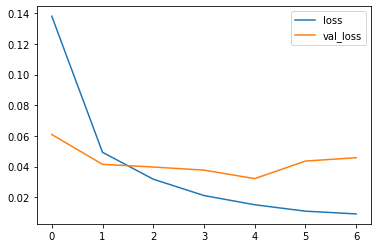

In [42]:
lossess[['loss','val_loss']].plot()

<AxesSubplot:>

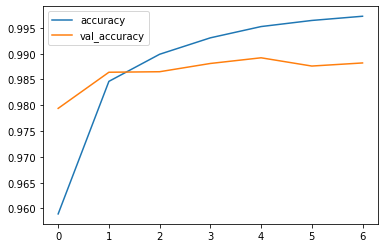

In [43]:
lossess[['accuracy','val_accuracy']].plot()

In [44]:
model.evaluate(x=X_test,y=y_cat_test,verbose=2)

313/313 - 1s - loss: 0.0458 - accuracy: 0.9882 - 912ms/epoch - 3ms/step


[0.045822180807590485, 0.9882000088691711]

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
predictions = model.predict(X_test)

In [49]:
classes_x=np.argmax(predictions,axis=1)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix0]

7

In [51]:
predictions[0]

array([6.6584227e-13, 1.1324692e-09, 7.0896400e-09, 1.4135204e-10,
       3.0223562e-12, 6.4433525e-14, 6.8422006e-18, 1.0000000e+00,
       2.7612574e-11, 1.5033929e-11], dtype=float32)

In [52]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [53]:
from sklearn.metrics import classification_report,confusion_matrix

In [54]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [56]:
confusion_matrix(y_test,classes_x)

array([[ 979,    0,    0,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1134,    0,    0,    0,    0,    1,    0,    0,    0],
       [   1,    0, 1020,    0,    0,    0,    2,    6,    3,    0],
       [   0,    0,    0, 1002,    0,    6,    0,    1,    1,    0],
       [   1,    1,    0,    0,  970,    0,    4,    1,    0,    5],
       [   1,    0,    0,    6,    0,  883,    1,    0,    0,    1],
       [   8,    2,    0,    0,    2,    2,  942,    0,    2,    0],
       [   0,    2,    4,    1,    0,    0,    0, 1017,    1,    3],
       [   7,    0,    1,    1,    0,    2,    1,    5,  955,    2],
       [   2,    2,    0,    1,    4,    8,    0,    9,    3,  980]],
      dtype=int64)

In [57]:
import seaborn as sns

<AxesSubplot:>

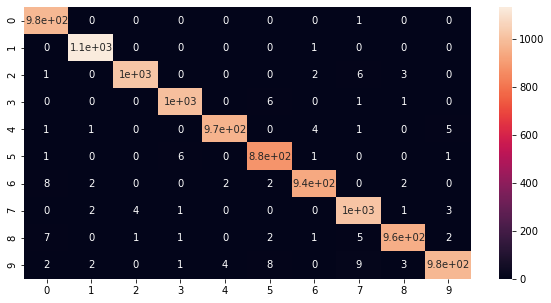

In [59]:

plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,classes_x),annot=True)

# Predicting a given image

In [65]:
my_num = X_test[1]

In [64]:
classes_x

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

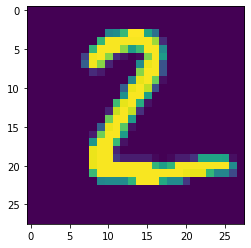

In [66]:
plt.imshow(my_num)

In [72]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_num.reshape(1, 28, 28, 1)),axis=1)

array([2], dtype=int64)